Всего изображений: 540
Found 479 files belonging to 5 classes.
Found 61 files belonging to 5 classes.
Class names: ['5', '6', '7', '8', '9']
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 512, 512, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                          

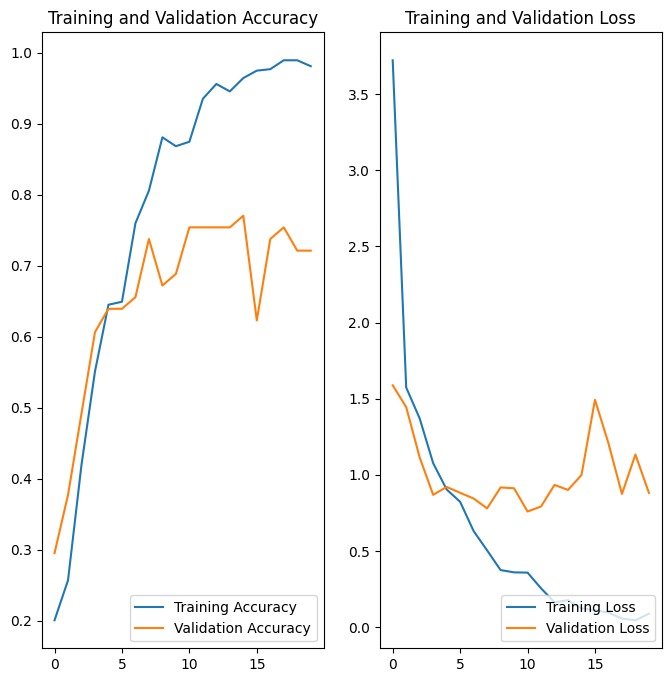

Model saved!


In [ ]:
from tensorflow.python.training.saver import metrics
from keras.src.mixed_precision.loss_scale_optimizer import optimizer
from keras.api._v2.keras import activations
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# defining dataset path
dataset_dir = pathlib.Path("/content/drive/MyDrive/datasets/cross_val_7")
dataset_train_dir = pathlib.Path("/content/drive/MyDrive/datasets/cross_val_7/train")
dataset_val_dir = pathlib.Path("/content/drive/MyDrive/datasets/cross_val_7/val")


image_count = len(list(dataset_dir.glob("*/*/*.jpg")))
print(f"Image count: {image_count}")

# batch size
batch_size = 32
# image size
img_width = 512
img_height = 512

# training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_train_dir2,
                                                       seed=123,
                                                       color_mode="rgb",
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)
# validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_val_dir2,
                                                       seed=123,
                                                       color_mode="rgb",
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)

# defining class names
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# cache
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#create model
num_classes = len(class_names)
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),

    # layers:
    # conv_1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    # max pooling
    layers.MaxPooling2D(),

    # conv_2
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # conv_3
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # regularization
    layers.Dropout(0.2),

    # flattening
    layers.Flatten(),
    # activation
    layers.Dense(128, activation='relu'),
    # fully-connected layer
    layers.Dense(num_classes)

])

# compile the model
model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

# print model summary
model.summary()

# train the model
epochs = 20 # number of epochs
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

# visualize training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

# save the model (manual mode)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Новый раздел

# Новый раздел

In [ ]:
model.save("/content/drive/MyDrive/datasets/corr_model_26_11.h5")